# Problem Statements
 * 1 Which rank has the highest number of deaths
 * 2 Has the number of deaths decreased or increased 
 * 3 What is the most common cause of deaths 
 * 4 What state has the highest  number of deaths 
 * 5 Average number

# Importing the Libraries 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# Importing and exploring the Dataset

In [3]:
police_df =  pd.read_csv('police_deaths_in_america.csv')

In [4]:
police_df.head()

,Rank,Name,Cause_of_Death,Date,Year,Month,Day,Department,State,K9_Unit
0,Constable,Darius Quimby,Stabbed,"Monday, January 3, 1791",1791,January,Monday,"Albany County Constable's Office, NY",New York,0
1,Sheriff,Cornelius Hogeboom,Gunfire,"Saturday, October 22, 1791",1791,October,Saturday,"Columbia County Sheriff's Office, NY",New York,0
2,Deputy Sheriff,Isaac Smith,Gunfire,"Thursday, May 17, 1792",1792,May,Thursday,"Westchester County Sheriff's Department, NY",New York,0
3,Marshal,Robert Forsyth,Gunfire,"Saturday, January 11, 1794",1794,January,Saturday,United States Department of Justice - United S...,United States,0
4,Deputy Sheriff,Robert Berwick,Gunfire,"Thursday, June 29, 1797",1797,June,Thursday,"New York County Sheriff's Office, NY",New York,0


In [5]:
police_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            26269 non-null  object
 1   Name            26269 non-null  object
 2   Cause_of_Death  26269 non-null  object
 3   Date            26269 non-null  object
 4   Year            26269 non-null  int64 
 5   Month           26269 non-null  object
 6   Day             26269 non-null  object
 7   Department      26269 non-null  object
 8   State           26269 non-null  object
 9   K9_Unit         26269 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 2.0+ MB


In [6]:
police_df.columns

Index(['Rank', 'Name', 'Cause_of_Death', 'Date', 'Year', 'Month', 'Day',
       'Department', 'State', 'K9_Unit'],
      dtype='object')

In [7]:
police_df.index

RangeIndex(start=0, stop=26269, step=1)

In [22]:
# checking for data uniqueness constraint in the month, days and state columns
print('The cause_of_deaths column has '  +str(len(police_df['Cause_of_Death'].unique())) + ' unique values ')
print('The State column has '  +str(len(police_df['State'].unique())) + ' unique values ')

The cause_of_deaths column has 37 unique values 
The State column has 58 unique values 


In [9]:
# The state column has more than 50 unique values this should be checked 
police_df['State'].unique()

array(['New York', 'United States', 'South Carolina', 'Pennsylvania',
       'North Carolina', 'Kentucky', 'Maine', 'Maryland', 'Vermont',
       'Tennessee', 'Ohio', 'Virginia', 'Indiana', 'Massachusetts',
       'Alabama', 'Rhode Island', 'Connecticut', 'Missouri', 'Texas',
       'Georgia', 'Florida', 'Wisconsin', 'Arkansas', 'California',
       'Louisiana', 'Delaware', 'Utah', 'Illinois', 'Washington',
       'New Jersey', 'Michigan', 'Nevada', 'Colorado', 'Idaho', 'Oregon',
       'Arizona', 'Kansas', 'Iowa', 'Nebraska', 'New Mexico',
       'West Virginia', 'District of Columbia', 'Minnesota',
       'New Hampshire', 'Wyoming', 'Montana', 'Mississippi',
       'North Dakota', 'South Dakota', 'Oklahoma', 'Hawaii',
       'Puerto Rico', 'Alaska', 'Panama', 'U.S. Virgin Islands', 'Guam',
       'American Samoa', 'Northern Mariana Islands'], dtype=object)

In [10]:
# It turns out that the dataset contains data about the other us territory 
# Federal officer where represent as united states this is changed to federal
police_df.loc[police_df['State'] == 'United States' , 'State'] = 'Federal'

In [11]:
# converting the date column to datetime
police_df['Date'] = pd.to_datetime(police_df['Date'], errors='coerce')

In [12]:
# Since the data column is datetime drop the year and month columns 
police_df = police_df.drop(columns=['Year', 'Month'])

In [13]:
police_df.head()

,Rank,Name,Cause_of_Death,Date,Day,Department,State,K9_Unit
0,Constable,Darius Quimby,Stabbed,1791-01-03,Monday,"Albany County Constable's Office, NY",New York,0
1,Sheriff,Cornelius Hogeboom,Gunfire,1791-10-22,Saturday,"Columbia County Sheriff's Office, NY",New York,0
2,Deputy Sheriff,Isaac Smith,Gunfire,1792-05-17,Thursday,"Westchester County Sheriff's Department, NY",New York,0
3,Marshal,Robert Forsyth,Gunfire,1794-01-11,Saturday,United States Department of Justice - United S...,Federal,0
4,Deputy Sheriff,Robert Berwick,Gunfire,1797-06-29,Thursday,"New York County Sheriff's Office, NY",New York,0


In [14]:
police_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Rank            26269 non-null  object        
 1   Name            26269 non-null  object        
 2   Cause_of_Death  26269 non-null  object        
 3   Date            26269 non-null  datetime64[ns]
 4   Day             26269 non-null  object        
 5   Department      26269 non-null  object        
 6   State           26269 non-null  object        
 7   K9_Unit         26269 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 1.6+ MB


# Data Visualization 

In [62]:
def group_order(df, grp_name, sort_name):
    """ Groups Df by col_name and sorts by sort_name   """
    try:
        grp_order = dict(df.groupby(by= [grp_name])[sort_name].agg('count').sort_values(ascending=False))
    except:
        print('error')
    
    return grp_order

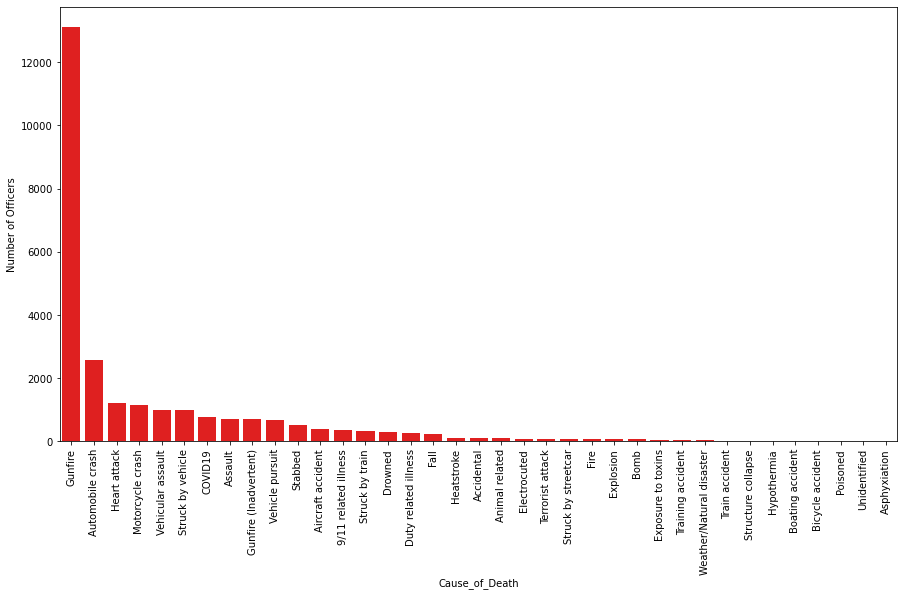

In [68]:
# count plot of the cause of death
cgrp_order = group_order(police_df, 'Cause_of_Death', 'Name')
plt.figure(figsize=(15,8))
sns.countplot(x = 'Cause_of_Death',
            data = police_df,
            color = 'r',
            order = cgrp_order )
plt.xticks(rotation=90)
plt.ylabel('Number of Officers')
plt.show()

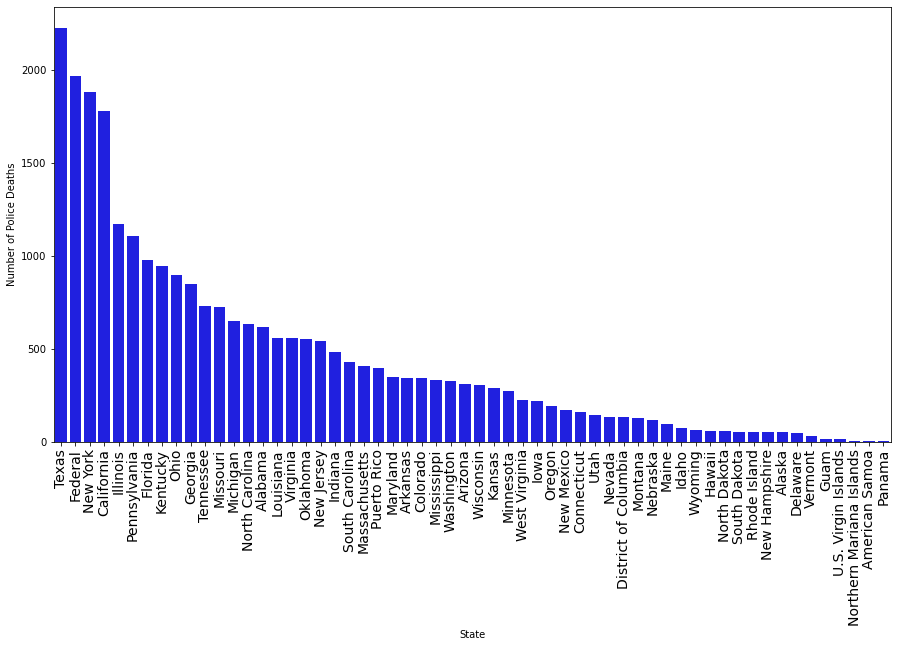

In [67]:
# Plot a count plot of the number of deaths in each state/region 
sgrp_order = group_order(police_df, 'State', 'Name')
plt.figure(figsize=(15,8))
sns.countplot(data = police_df,
            x = 'State',
            color = 'b',
            order = sgrp_order
            )
plt.xticks(fontsize = 14, rotation = 90)
plt.ylabel('Number of Police Deaths')
plt.xlabel('State')
plt.show()